# Prueba modulacion distancia coseno

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from nltk.tokenize import word_tokenize
import nltk
import we_to_signal as wes

In [39]:
#Carga de embeddings
from gensim.models import Word2Vec
from gensim.models import FastText

emotion_list = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

poems_w2v = {}
poems_fst = {}

for e in emotion_list:
    w2v_lines = Word2Vec.load("embeddings_poems/w2v_model_"+e)
    fst_lines = FastText.load("embeddings_poems/fst_model_"+e)
    poems_w2v[e] = w2v_lines
    poems_fst[e] = fst_lines

In [40]:
#Creamos un vector canonico que servirá para medir la distancia coseno de los vectores.
constant_vector = np.zeros((100,))
constant_vector[0] = 1

In [41]:
#Construccion de datos w2v
from sklearn.metrics.pairwise import cosine_similarity

emotion_cosine_similarity_w2v = {}

for emotion in emotion_list:
    emotion_cosine_similarity_w2v[emotion] = []
    
    for word in poems_w2v[emotion].wv.key_to_index.keys():
        emotion_cosine_similarity_w2v[emotion].append(cosine_similarity([poems_w2v[emotion].wv.get_vector(word,norm=True)],[constant_vector])[0][0])

In [42]:
#Construccion de datos fst

emotion_cosine_similarity_fst = {}

for emotion in emotion_list:
    emotion_cosine_similarity_fst[emotion] = []
    
    for word in poems_fst[emotion].wv.key_to_index.keys():
        emotion_cosine_similarity_fst[emotion].append(cosine_similarity([poems_fst[emotion].wv.get_vector(word,norm=True)],[constant_vector])[0][0])

Text(0.5, 1.0, 'FST cosine similarity for canonical vector')

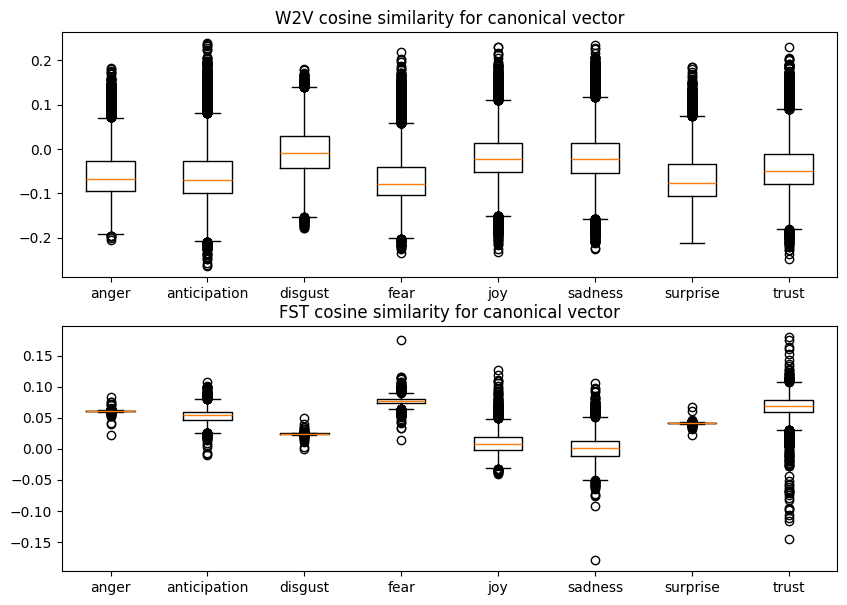

In [43]:
fig,ax = plt.subplots(2,figsize=(10,7))

print
ax[0].boxplot([element[1] for element in emotion_cosine_similarity_w2v.items()])
ax[0].set_xticklabels(list(emotion_cosine_similarity_w2v.keys()))
ax[0].set_title("W2V cosine similarity for canonical vector")

ax[1].boxplot([element[1] for element in emotion_cosine_similarity_fst.items()])
ax[1].set_xticklabels(list(emotion_cosine_similarity_fst.keys()))
ax[1].set_title("FST cosine similarity for canonical vector")

In [44]:
from scipy.spatial.distance import cosine

emotion_cosine_w2v = {}

for emotion in emotion_list:
    emotion_cosine_w2v[emotion] = []
    
    for word in poems_w2v[emotion].wv.key_to_index.keys():
        emotion_cosine_w2v[emotion].append(cosine(poems_w2v[emotion].wv.get_vector(word,norm=True),constant_vector))

In [45]:
emotion_cosine_fst = {}

for emotion in emotion_list:
    emotion_cosine_fst[emotion] = []
    
    for word in poems_fst[emotion].wv.key_to_index.keys():
        emotion_cosine_fst[emotion].append(cosine(poems_fst[emotion].wv.get_vector(word,norm=True),constant_vector))

Text(0.5, 1.0, 'FST cosine distance for canonical vector')

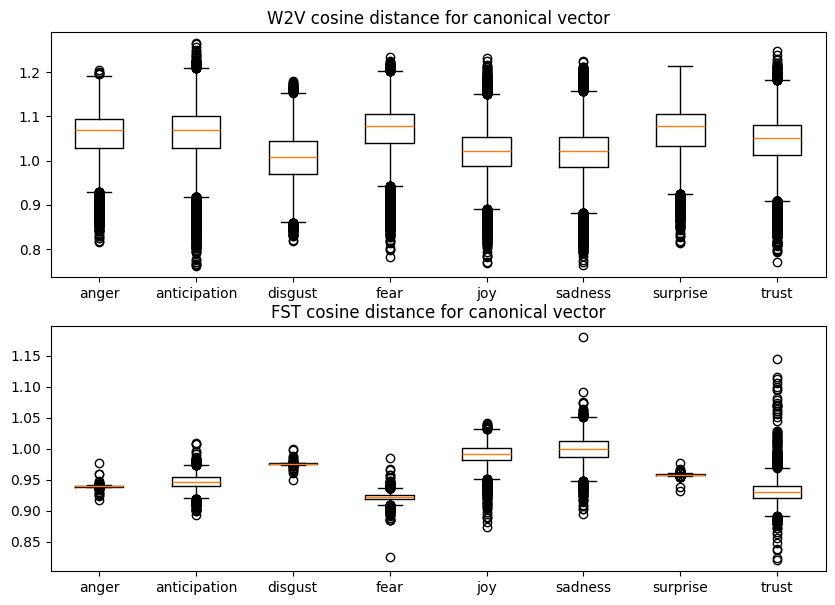

In [46]:
fig,ax = plt.subplots(2,figsize=(10,7))

print
ax[0].boxplot([element[1] for element in emotion_cosine_w2v.items()])
ax[0].set_xticklabels(list(emotion_cosine_w2v.keys()))
ax[0].set_title("W2V cosine distance for canonical vector")

ax[1].boxplot([element[1] for element in emotion_cosine_fst.items()])
ax[1].set_xticklabels(list(emotion_cosine_fst.keys()))
ax[1].set_title("FST cosine distance for canonical vector")

In [47]:
from scipy.spatial.distance import euclidean

emotion_euclidean_w2v = {}

for emotion in emotion_list:
    emotion_euclidean_w2v[emotion] = []
    
    for word in poems_w2v[emotion].wv.key_to_index.keys():
        emotion_euclidean_w2v[emotion].append(euclidean(poems_w2v[emotion].wv.get_vector(word,norm=True),constant_vector))

In [48]:
emotion_euclidean_fst = {}

for emotion in emotion_list:
    emotion_euclidean_fst[emotion] = []
    
    for word in poems_fst[emotion].wv.key_to_index.keys():
        emotion_euclidean_fst[emotion].append(euclidean(poems_fst[emotion].wv.get_vector(word,norm=True),constant_vector))


Text(0.5, 1.0, 'FST euclidean distance for canonical vector')

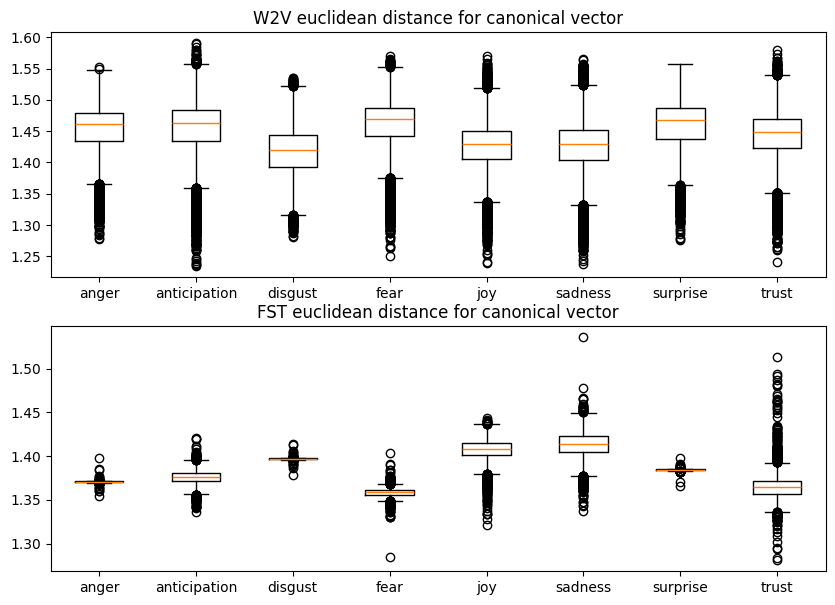

In [49]:
fig,ax = plt.subplots(2,figsize=(10,7))

print
ax[0].boxplot([element[1] for element in emotion_euclidean_w2v.items()])
ax[0].set_xticklabels(list(emotion_euclidean_w2v.keys()))
ax[0].set_title("W2V euclidean distance for canonical vector")

ax[1].boxplot([element[1] for element in emotion_euclidean_fst.items()])
ax[1].set_xticklabels(list(emotion_euclidean_fst.keys()))
ax[1].set_title("FST euclidean distance for canonical vector")

In [50]:
from scipy.spatial.distance import minkowski

emotion_minkowski_w2v = {}

for emotion in emotion_list:
    emotion_minkowski_w2v[emotion] = []
    
    for word in poems_w2v[emotion].wv.key_to_index.keys():
        emotion_minkowski_w2v[emotion].append(minkowski(poems_w2v[emotion].wv.get_vector(word,norm=True),constant_vector))

In [51]:
emotion_minkowski_fst = {}

for emotion in emotion_list:
    emotion_minkowski_fst[emotion] = []
    
    for word in poems_fst[emotion].wv.key_to_index.keys():
        emotion_minkowski_fst[emotion].append(minkowski(poems_fst[emotion].wv.get_vector(word,norm=True),constant_vector))

Text(0.5, 1.0, 'FST minkowski distance for canonical vector')

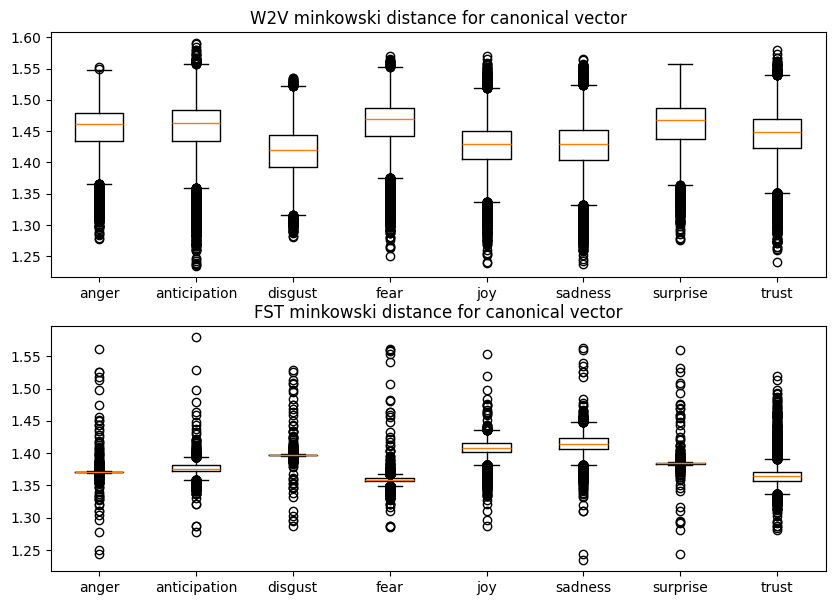

In [52]:
fig,ax = plt.subplots(2,figsize=(10,7))

ax[0].boxplot([element[1] for element in emotion_minkowski_w2v.items()])
ax[0].set_xticklabels(list(emotion_minkowski_w2v.keys()))
ax[0].set_title("W2V minkowski distance for canonical vector")

ax[1].boxplot([element[1] for element in emotion_minkowski_fst.items()])
ax[1].set_xticklabels(list(emotion_minkowski_fst.keys()))
ax[1].set_title("FST minkowski distance for canonical vector")

In [88]:
from scipy.spatial.distance import correlation
emotion_correlation_w2v = {}

for emotion in emotion_list:
    emotion_correlation_w2v[emotion] = []
    
    for word in poems_w2v[emotion].wv.key_to_index.keys():
        emotion_correlation_w2v[emotion].append(correlation(poems_w2v[emotion].wv.get_vector(word,norm=True),constant_vector))

In [89]:
emotion_correlation_fst = {}

for emotion in emotion_list:
    emotion_correlation_fst[emotion] = []
    
    for word in poems_fst[emotion].wv.key_to_index.keys():
        emotion_correlation_fst[emotion].append(correlation(poems_fst[emotion].wv.get_vector(word,norm=True),constant_vector))

Text(0.5, 1.0, 'FST correlation distance for canonical vector')

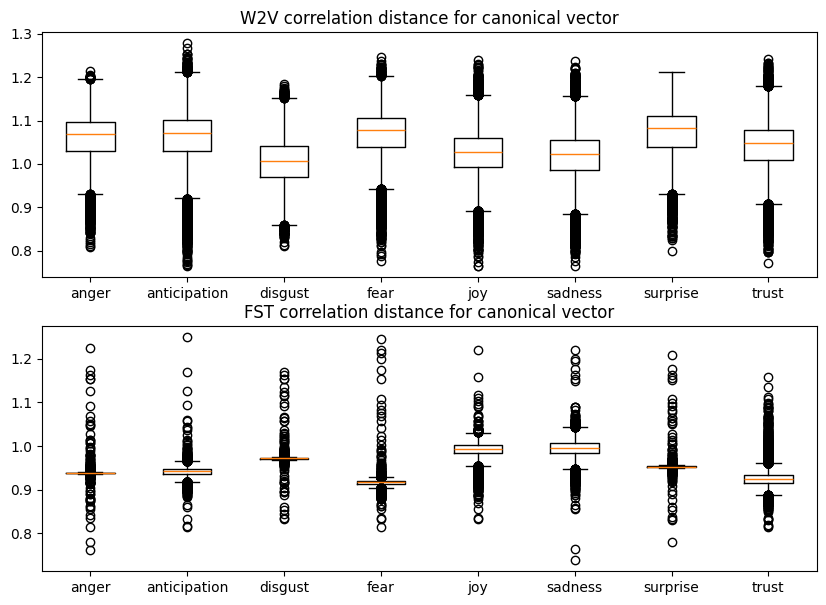

In [90]:
fig,ax = plt.subplots(2,figsize=(10,7))

ax[0].boxplot([element[1] for element in emotion_correlation_w2v.items()])
ax[0].set_xticklabels(list(emotion_correlation_w2v.keys()))
ax[0].set_title("W2V correlation distance for canonical vector")

ax[1].boxplot([element[1] for element in emotion_correlation_fst.items()])
ax[1].set_xticklabels(list(emotion_correlation_fst.keys()))
ax[1].set_title("FST correlation distance for canonical vector")

In [105]:
from scipy.spatial.distance import mahalanobis
emotion_mahalanobis_w2v = {}

for emotion in emotion_list:
    emotion_mahalanobis_w2v[emotion] = []
    
    for word in poems_w2v[emotion].wv.key_to_index.keys():
        v = np.cov(np.array([poems_w2v[emotion].wv.get_vector(word,norm=True),constant_vector]).T)
        emotion_mahalanobis_w2v[emotion].append(mahalanobis(poems_w2v[emotion].wv.get_vector(word,norm=True),constant_vector,v))

In [106]:
emotion_mahalanobis_fst = {}

for emotion in emotion_list:
    emotion_mahalanobis_fst[emotion] = []
    
    for word in poems_fst[emotion].wv.key_to_index.keys():
        v = np.cov(np.array([poems_fst[emotion].wv.get_vector(word,norm=True),constant_vector]).T)
        emotion_mahalanobis_fst[emotion].append(mahalanobis(poems_fst[emotion].wv.get_vector(word,norm=True),constant_vector,v))

Text(0.5, 1.0, 'FST correlation distance for canonical vector')

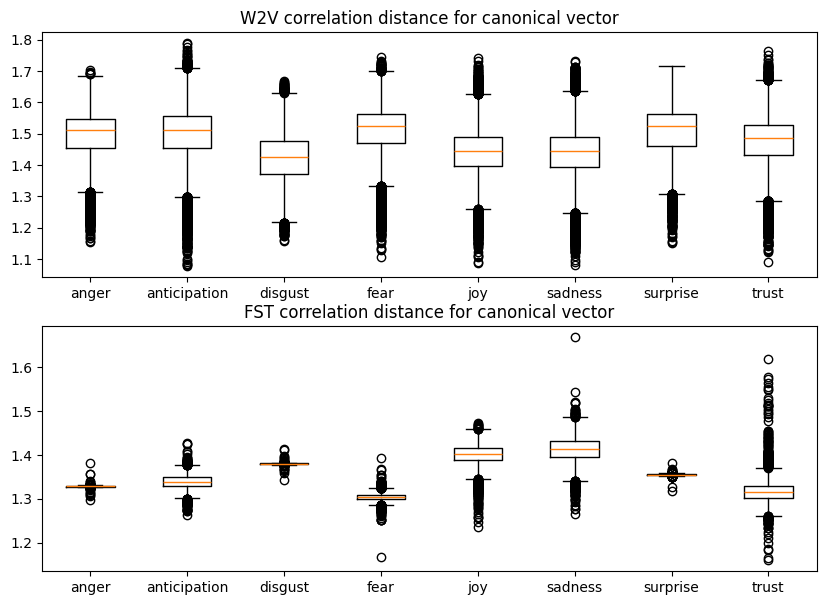

In [107]:
fig,ax = plt.subplots(2,figsize=(10,7))

ax[0].boxplot([element[1] for element in emotion_mahalanobis_w2v.items()])
ax[0].set_xticklabels(list(emotion_mahalanobis_w2v.keys()))
ax[0].set_title("W2V correlation distance for canonical vector")

ax[1].boxplot([element[1] for element in emotion_mahalanobis_fst.items()])
ax[1].set_xticklabels(list(emotion_mahalanobis_fst.keys()))
ax[1].set_title("FST correlation distance for canonical vector")

In [67]:
minkowski_data_w2v = []
minkowski_data_fst = []

for emotion in emotion_list:
    for word in poems_w2v[emotion].wv.key_to_index.keys():
        vector = poems_w2v[emotion].wv.get_vector(word,norm=True)
        minkowski_data_w2v.append((vector,minkowski(vector,constant_vector),emotion))
    
    for word in poems_fst[emotion].wv.key_to_index.keys():
        vector = poems_fst[emotion].wv.get_vector(word,norm=True)
        minkowski_data_fst.append((vector,minkowski(vector,constant_vector),emotion))

minkowski_distances_w2v = [[distance[1]] for distance in minkowski_data_w2v]
minkowski_distances_fst = [[distance[1]] for distance in minkowski_data_fst]

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler_w2v = MinMaxScaler(feature_range=(0, 20))
scaler_fst = MinMaxScaler(feature_range=(0, 20))

scaler_w2v.fit(np.array(minkowski_distances_w2v))
scaler_fst.fit(np.array(minkowski_distances_fst))

MinMaxScaler(feature_range=(0.9, 1))

In [85]:
scaler_fst.transform([[1.441]])[0][0]

0.962806007029484

In [75]:
with open("mod_minkowski_embeddings_fst.csv", 'w') as archivo:
    header = ""
    for i in range(100):
        header += "N"+str(i)+","
    header += "emotion\n"
    archivo.write(header)
    for vector,distance,emotion in minkowski_data_fst:
        # Samples per second
        sps = 100
        # Duration
        duration_s = 1.0
        # ac: amplitude of the carrier.
        # carrier_hz: Frequency of the carrier
        # k_p: deviation constant
        carrier_amplitude = 1.0
        carrier_hz = scaler_fst.transform([[distance]])[0][0]
        k = 25.0

        # First, define our range of sample numbers
        each_sample_number = np.arange(duration_s * sps)

        # Create the term that create the carrier
        carrier = 2 * np.pi * each_sample_number * carrier_hz / sps

        # Now create the modulated waveform, and attenuate it
        vector = np.cos(carrier + k*vector)
        vector = vector/np.linalg.norm(vector)

        info = ""
        for i in range(len(vector)):
            info += str(vector[i]) + ","
        info += str(emotion)
        archivo.write(info+"\n")

In [76]:
with open("mod_minkowski_embeddings_w2v.csv", 'w') as archivo:
    header = ""
    for i in range(100):
        header += "N"+str(i)+","
    header += "emotion\n"
    archivo.write(header)
    for vector,distance,emotion in minkowski_data_w2v:
        # Samples per second
        sps = 100
        # Duration
        duration_s = 1.0
        # ac: amplitude of the carrier.
        # carrier_hz: Frequency of the carrier
        # k_p: deviation constant
        carrier_amplitude = 1.0
        carrier_hz = scaler_w2v.transform([[distance]])[0][0]
        k = 25.0

        # First, define our range of sample numbers
        each_sample_number = np.arange(duration_s * sps)

        # Create the term that create the carrier
        carrier = 2 * np.pi * each_sample_number * carrier_hz / sps

        # Now create the modulated waveform, and attenuate it
        vector = np.cos(carrier + k*vector)
        vector = vector/np.linalg.norm(vector)

        info = ""
        for i in range(len(vector)):
            info += str(vector[i]) + ","
        info += str(emotion)
        archivo.write(info+"\n")

In [96]:
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
emotion_minkowski_w2v_mean = {}
w2v_mean_array = []
for emotion in emotion_list:
    emotion_minkowski_w2v_mean[emotion] = np.mean(emotion_minkowski_w2v[emotion])
    w2v_mean_array.append(np.mean(emotion_minkowski_w2v[emotion]))
emotion_minkowski_w2v_mean

{'anger': 1.4549696098369764,
 'anticipation': 1.4559620004512324,
 'disgust': 1.4181519386329449,
 'fear': 1.4615446057386123,
 'joy': 1.4272438390588476,
 'sadness': 1.4270568244284259,
 'surprise': 1.459792910619131,
 'trust': 1.4439954437275226}

In [97]:
emotion_minkowski_fst_mean = {}
fst_mean_array = []
for emotion in emotion_list:
    emotion_minkowski_fst_mean[emotion] = np.mean(emotion_minkowski_fst[emotion])
    fst_mean_array.append(np.mean(emotion_minkowski_fst[emotion]))
emotion_minkowski_fst_mean

{'anger': 1.3708215811436453,
 'anticipation': 1.3765644060547233,
 'disgust': 1.3970465875000906,
 'fear': 1.3591658028866078,
 'joy': 1.4079371810956152,
 'sadness': 1.4142863002012944,
 'surprise': 1.3845023233518228,
 'trust': 1.365061541024339}

In [98]:
fst_mean_array = np.array(fst_mean_array)
w2v_mean_array = np.array(w2v_mean_array)

fst_mean_array = (fst_mean_array - np.min(fst_mean_array))/(np.max(fst_mean_array)-np.min(fst_mean_array))
w2v_mean_array = (w2v_mean_array - np.min(w2v_mean_array))/(np.max(w2v_mean_array)-np.min(w2v_mean_array))


In [99]:
fst_mean_array
w2v_mean_array

array([0.8484768 , 0.8713468 , 0.        , 1.        , 0.20952619,
       0.20521637, 0.95963154, 0.5955731 ])

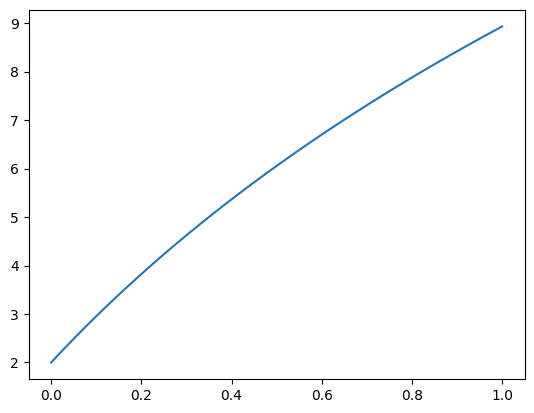

In [100]:
x = np.linspace(0,1,100)
y = 10*np.log(1+x) + 2
plt.plot(x,y)

In [101]:
fst_mean_array = 10*np.log(1+fst_mean_array) + 2
w2v_mean_array = 10*np.log(1+w2v_mean_array) + 2

display(fst_mean_array,w2v_mean_array)

array([3.91826212, 4.74328333, 7.23091628, 2.        , 8.33829051,
       8.93147181, 5.78201452, 3.01618335])

array([8.14361947, 8.26658388, 2.        , 8.93147181, 3.90228708,
       3.86659114, 8.72756466, 6.6723298 ])